In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [40]:
# Load your dataset
df = pd.read_csv('data.csv')

In [41]:
# Check for missing values
missing_data = df.isnull().sum()

# Display missing data
print(missing_data)

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64


In [42]:
# Handle missing value in total_price
df['total_price'].fillna(df['total_price'].mean(), inplace=True)

In [43]:
# Check for missing values
missing_data = df.isnull().sum()

# Display missing data
print(missing_data)

record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64


In [44]:
# Convert the 'week' column to datetime format
df['week'] = pd.to_datetime(df['week'], format='%d/%m/%y')

In [45]:
# Feature engineering
df['year'] = df['week'].dt.year
df['month'] = df['week'].dt.month
df['weekday'] = df['week'].dt.weekday
df['price_discount'] = df['base_price'] - df['total_price']

In [46]:
# Drop the 'week' column
df.drop(columns=['week'], inplace=True)

In [47]:
df.head()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,year,month,weekday,price_discount
0,1,8091,216418,99.0375,111.8625,0,0,20,2011,1,0,12.825
1,2,8091,216419,99.0375,99.0375,0,0,28,2011,1,0,0.000
2,3,8091,216425,133.9500,133.9500,0,0,19,2011,1,0,0.000
3,4,8091,216233,133.9500,133.9500,0,0,44,2011,1,0,0.000
4,5,8091,217390,141.0750,141.0750,0,0,52,2011,1,0,0.000


In [48]:
# Select features and target variable
features= ['store_id', 'sku_id', 'total_price', 'base_price', 'is_featured_sku', 'is_display_sku', 'year', 'month', 'weekday', 'price_discount']
target = 'units_sold'

In [49]:
# Shuffle the data
data = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [50]:
df.head()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,year,month,weekday,price_discount
0,1,8091,216418,99.0375,111.8625,0,0,20,2011,1,0,12.825
1,2,8091,216419,99.0375,99.0375,0,0,28,2011,1,0,0.000
2,3,8091,216425,133.9500,133.9500,0,0,19,2011,1,0,0.000
3,4,8091,216233,133.9500,133.9500,0,0,44,2011,1,0,0.000
4,5,8091,217390,141.0750,141.0750,0,0,52,2011,1,0,0.000


In [51]:
from sklearn.model_selection import train_test_split
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# from sklearn.ensemble import RandomForestRegressor
# regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
# regressor.fit(X_train, y_train)

# from sklearn.tree import DecisionTreeRegressor
# regressor = DecisionTreeRegressor(random_state = 0)
# regressor.fit(X_train, y_train)

# from sklearn.linear_model import LinearRegression

# regressor = LinearRegression()
# regressor.fit(X_train, y_train)

# from sklearn.linear_model import LogisticRegression

# regressor = LogisticRegression(random_state= 0)
# regressor.fit(X_train, y_train)

# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
# poly_reg = PolynomialFeatures(degree = 4)
# X_poly = poly_reg.fit_transform(X_train)
# regressor = LinearRegression()
# regressor.fit(X_poly, y_train)

# from sklearn.svm import SVR
# regressor = SVR(kernel = 'rbf')
# regressor.fit(X_train, y_train)

# from sklearn.ensemble import GradientBoostingRegressor
# regressor = GradientBoostingRegressor(random_state=42)
# regressor.fit(X_train, y_train)

# # Example of Hyperparameter Tuning for RandomForestRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Instantiate the GridSearchCV object
# regressor = GridSearchCV(estimator=RandomForestRegressor(random_state=0),
#                            param_grid=param_grid,
#                            scoring='r2',
#                            cv=5,
#                            verbose=1,
#                            n_jobs=-1)

# # Fit the GridSearchCV to find the best parameters
# regressor.fit(X_train, y_train)

# # Get the best parameters and best score
# print("Best Parameters found: ", regressor.best_params_)
# print("Best R-squared score on validation set: {:.2f}".format(regressor.best_score_))


# import xgboost as xgb
# regressor = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5, random_state=42)
# regressor.fit(X_train, y_train)

# Create the base model
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize GridSearchCV
regressor = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=3, verbose=1)

# Fit the grid search to the data
regressor.fit(X_train, y_train)

# Extract the best model
best_model = regressor.best_estimator_

Fitting 3 folds for each of 729 candidates, totalling 2187 fits


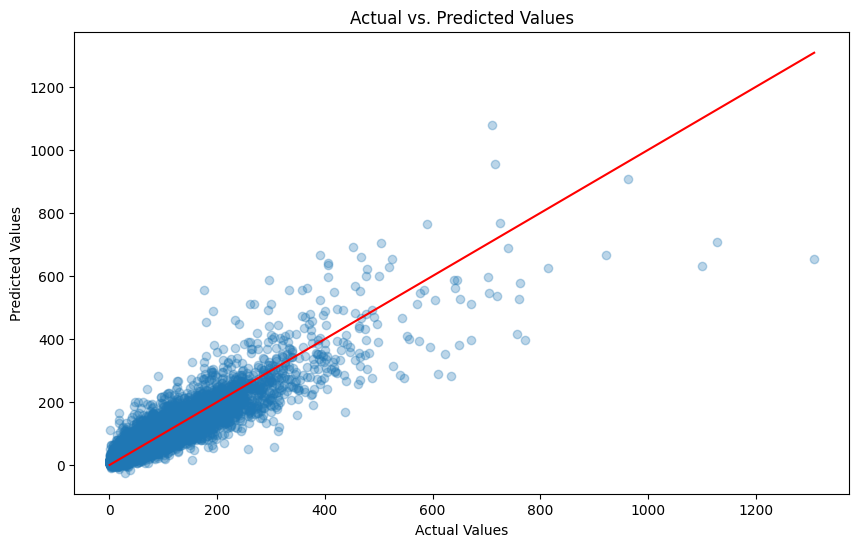

In [53]:
y_pred = regressor.predict(X_test)
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()


In [54]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# # Predict on the test data
# best_regressor = regressor.best_estimator_
# y_pred = regressor.predict(X_test)

# # Evaluate the model
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# print(f'Mean Absolute Error: {mae}')
# print(f'Mean Squared Error: {mse}')

# # Visualize the output
# plt.figure(figsize=(8, 6))
# plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted')
# plt.scatter(y_test, y_test, color='red', alpha=0.5, label='Actual')
# plt.xlabel('Actual Units Sold')
# plt.ylabel('Predicted Units Sold')
# plt.title('Actual vs Predicted Units Sold (Random Forest Regression)')
# plt.show()


In [55]:
# Print predicted and actual values side by side
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.values.reshape(len(y_test), 1)), axis=1))

[[ 43.16096878  41.        ]
 [ 22.60546303  13.        ]
 [360.22787476 339.        ]
 ...
 [125.34116364 180.        ]
 [ 29.10991287  17.        ]
 [ 51.77089691  52.        ]]


In [56]:
from sklearn.metrics import r2_score
# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')

R-squared (R²): 0.8400682630458205
